In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import allensdk.brain_observatory.behavior.behavior_project_cache as bpc

import allensdk
import pkg_resources
print('allensdk version 2.10.2 or higher is required, you have {} installed'.format(pkg_resources.get_distribution("allensdk").version))

allensdk version 2.10.2 or higher is required, you have 2.16.2 installed


In [2]:
%matplotlib notebook

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_1407223/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
output_dir = '/media/maria/DATA/AllenRLData'
bc = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=output_dir)
          
experiment_table = bc.get_ophys_experiment_table()     

ophys_session_table.csv: 100%|███████████████| 247k/247k [00:00<00:00, 685kMB/s]
behavior_session_table.csv: 100%|█████████| 1.59M/1.59M [00:00<00:00, 2.13MMB/s]
ophys_experiment_table.csv: 100%|████████████| 657k/657k [00:00<00:00, 783kMB/s]
ophys_cells_table.csv: 100%|██████████████| 4.28M/4.28M [00:02<00:00, 1.52MMB/s]
/home/maria/anaconda3/lib/python3.9/site-packages/allensdk/brain_observatory/behavior/behavior_project_cache/behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by usi

In [7]:
ophys_experiment_id = 957759562
dataset = bc.get_behavior_ophys_experiment(ophys_experiment_id)

behavior_ophys_experiment_957759562.nwb: 100%|█| 241M/241M [02:09<00:00, 1.86MMB


In [9]:
help(dataset)

Help on BehaviorOphysExperiment in module allensdk.brain_observatory.behavior.behavior_ophys_experiment object:

class BehaviorOphysExperiment(allensdk.brain_observatory.behavior.behavior_session.BehaviorSession)
 |  BehaviorOphysExperiment(behavior_session: allensdk.brain_observatory.behavior.behavior_session.BehaviorSession, projections: allensdk.brain_observatory.behavior.data_objects.projections.Projections, ophys_timestamps: allensdk.brain_observatory.behavior.data_objects.timestamps.ophys_timestamps.OphysTimestamps, cell_specimens: allensdk.brain_observatory.behavior.data_objects.cell_specimens.cell_specimens.CellSpecimens, metadata: allensdk.brain_observatory.behavior.data_objects.metadata.behavior_ophys_metadata.BehaviorOphysMetadata, motion_correction: allensdk.brain_observatory.behavior.data_objects.motion_correction.MotionCorrection, date_of_acquisition: allensdk.brain_observatory.behavior.data_objects.metadata.behavior_metadata.date_of_acquisition.DateOfAcquisition)
 |  
 |

In [10]:
dataset.metadata

{'equipment_name': 'MESO.1',
 'sex': 'F',
 'age_in_days': 213,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_4_images_B',
 'date_of_acquisition': datetime.datetime(2019, 9, 27, 8, 58, 37, 5000, tzinfo=tzutc()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('40897cd4-3279-4a2d-b65d-b3f984e34e17'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '457841',
 'project_code': 'VisualBehaviorMultiscope',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 957032492,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1018028342,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 150,
 'targeted_imaging_depth': 150,
 'imaging_plane_group': 0,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 957759562,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 957020350,
 'targeted_structure': 'VISp'}

<IPython.core.display.Javascript object>


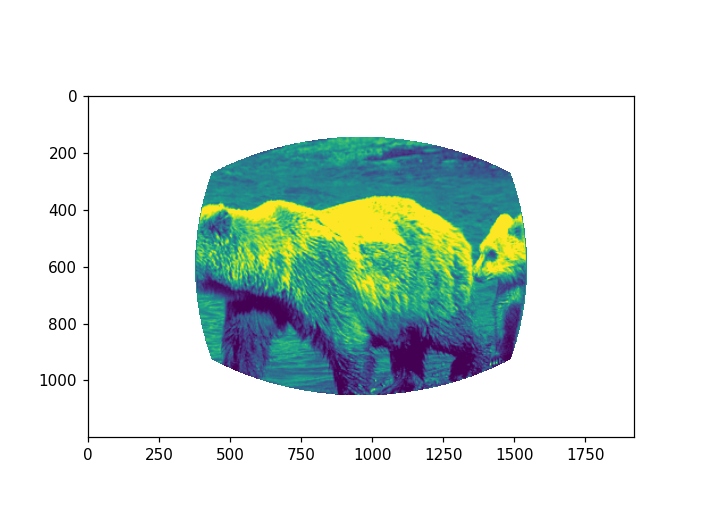

In [20]:
im=dataset.stimulus_templates.iloc[0]['unwarped']
plt.imshow(im)